In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)

In [3]:
ntuple_tracks = uproot.open('/data/newhouse/LRT/seeds/LRTAnalysis_output_tracks.root')
ntuple_seeds = uproot.open('/data/newhouse/LRT/seeds/LRTAnalysis_output_seeds.root')
ntuple_cand = uproot.open('/data/newhouse/LRT/seeds/LRTAnalysis_candidate_tracks.root')

In [4]:

truth_columns = [
"truth_nSiHits",
"truth_nPixHits",
"truth_status",
"truth_fidPass",
"truth_r",
"truth_phi",
"truth_dphi",
"truth_z",
"truth_pt",
"truth_qOp",
"truth_d0",
"truth_z0",
"truth_eta",
"truth_barcode",
"truth_charge",
"truth_pdgId",
"truth_parentIdLLP",
"truth_parentId",
"truth_VSIorigin",
]

track_columns = [
"isFake",
"isSignal",
"truth_origin",
"index",
"truth_matchProb",
# "truth_link",
# "truth_type",
"pt",
"qOp",
"eta",
"d0",
"z0",
"link",
"isLRTrack",
"radiusOdFirstHit",
"nSiHits",
"nPixHits",
"nTRTHits",
"nPixHoles",
"nSiHoles",
"nPixShared",
"nSiShared",
"nContribPixLay",
"nPixOutliers",
"nSiOutliers",
"nTRTOutliers",
"chiSquared",
"nDOF",
"passLoose",
"passTight",
]

event_columns = [
"nTracks",
"nTruth",
"nTracksAccept",
"nTruthAccept",
"mu",
"event",
"mcid",
]

df_seeds = ntuple_seeds['Trees']['eventTree'].pandas.df(track_columns, flatten=True, )
df_tracks = ntuple_tracks['Trees']['eventTree'].pandas.df(track_columns, flatten=True, )
df_cand = ntuple_cand['Trees']['eventTree'].pandas.df(track_columns, flatten=True, )


In [5]:
df_seeds.head()

isFake  isSignal  truth_origin  index  truth_matchProb  \
entry subentry                                                           
0     0           True     False             1      0             0.50   
      1           True     False             1      1             0.40   
      2           True     False             1      2             0.25   
      3          False     False             2      3             1.00   
      4          False     False             2      4             1.00   

                       pt       qOp       eta         d0          z0  link  \
entry subentry                                                               
0     0          2.177929 -0.459152  2.415129 -15.831694 -240.730423    -1   
      1          2.849502 -0.350939  2.420356 -18.816961 -247.520020    -1   
      2          2.648947 -0.377508  2.404797  -0.309635 -275.414948    -1   
      3         12.716499  0.078638  2.428958  -0.388777   97.775223    -1   
      4          2.543324  0.393186 -2.502557   1.741752 -117.892914    -1   

                isLRTrack  radiusOdFirstHit  nSiHits  nPixHits  nTRTHits  \
entry subentry                                                             
0     0                 0        282.417847        4         0         0   
      1                 0        282.410278        5         0         0   
      2                 0        367.206696        4         0         0   
      3                 0        286.669495        4         0         0   
      4                 0        280.967590        4         0         0   

                nPixHoles  nSiHoles  nPixShared  nSiShared  nContribPixLay  \
entry subentry                                                               
0     0                 0         5           0          0               0   
      1                 0         2           0          0               0   
      2                 0         4           0          0               0   
      3                 0         4           0          0               0   
      4                 0         0           0          0               0   

                nPixOutliers  nSiOutliers  nTRTOutliers  chiSquared  nDOF  \
entry subentry                                                              
0     0                    0            0             0         0.0     0   
      1                    0            0             0         0.0     0   
      2                    0            0             0         0.0     0   
      3                    0            0             0         0.0     0   
      4                    0            0             0         0.0     0   

                passLoose  passTight  
entry subentry                        
0     0                 1          1  
      1                 1          1  
      2                 1          0  
      3                 1          0  
      4                 1          0

In [6]:
# Add additional variables
for df in [df_seeds, df_tracks, df_cand]:
    # John's "geometric variable"
    df['geometric_var'] = abs(np.arctan2(abs(df.d0),df.z0)-2*np.arctan(np.exp(-df.eta)))
    # abs values
    df['abs_z0'] = abs(df.z0)
    df['abs_d0'] = abs(df.d0)
    df['abs_eta'] = abs(df.eta)


In [7]:
# # Define collections of good and fake tracks
for df in [df_seeds, df_tracks, df_cand]:
    df['good'] = (df.truth_matchProb > 0.5) & (df.link>=0)

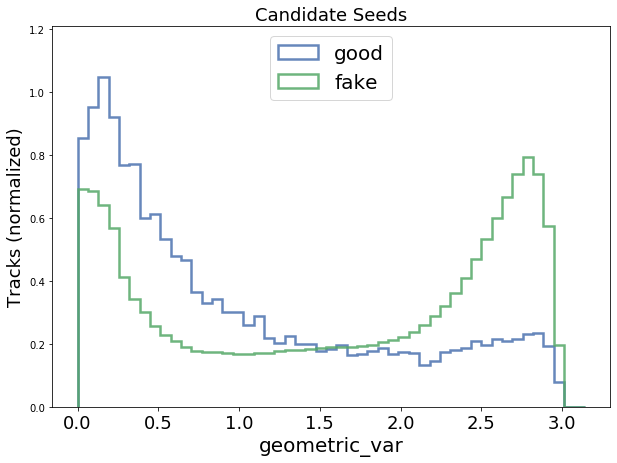

/usr/local/bin/start_ipykernel.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


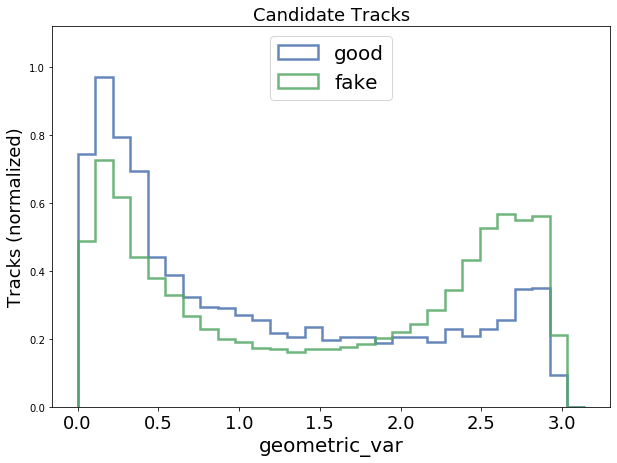

/usr/local/bin/start_ipykernel.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


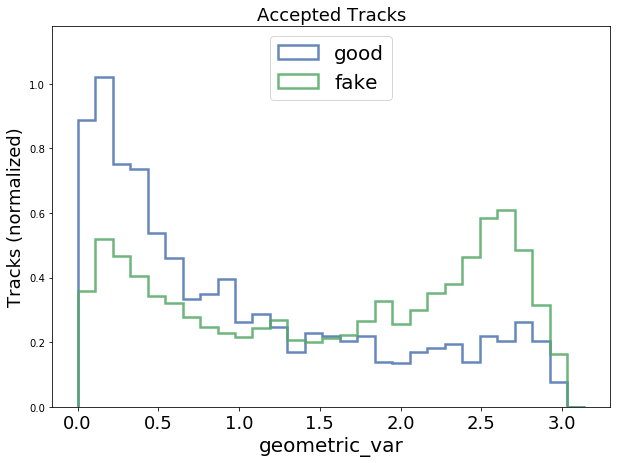

In [7]:
def plot_compare(df, var, title="", bins=np.linspace(0,1,100), density=1):

    fig = plt.figure(figsize=[10,7])
    ax = plt.axes()
    x = [df[df.good][var], df[df.good==False][var],]
    
    edgecolors = ['#4C72B0','#55A868']
    for i in [0,1]:
        ax.hist(x[i], edgecolor=edgecolors[i], histtype='step', linewidth=2.5, alpha=0.85, density=density, bins=bins)
    
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.set_xlabel(var, fontsize=20)
    ax.set_ylabel("Tracks (normalized)", fontsize=18)
    ax.set_title(title, fontsize=18)
    ax.legend(['good', 'fake'], loc='upper center', fontsize=20)
    # ax.set_yscale('log')
    ymin, ymax = plt.ylim()
    plt.ylim(ymin,ymax*1.1)
    plt.show()
    
# plot_compare(df_seeds, 'truth_matchProb', "Candidate Seeds", )
# plot_compare(df_cand, 'truth_matchProb', "Candidate Tracks", )
# plot_compare(df_tracks, 'truth_matchProb', "Accepted Tracks",)

plot_compare(df_seeds[df_seeds.isLRTrack>0], 'geometric_var', "Candidate Seeds", bins=np.linspace(0,3.14159,50))
plot_compare(df_cand[df_seeds.isLRTrack>0], 'geometric_var', "Candidate Tracks", bins=np.linspace(0,3.14159,30))
plot_compare(df_tracks[df_seeds.isLRTrack>0], 'geometric_var', "Accepted Tracks", bins=np.linspace(0,3.14159,30))


In [12]:
good_lrt_seeds = df_seeds[(df_seeds.isLRTrack>0) & (df.good == True)]
fake_lrt_seeds = df_seeds[(df_seeds.isLRTrack>0) & (df.good == False)]

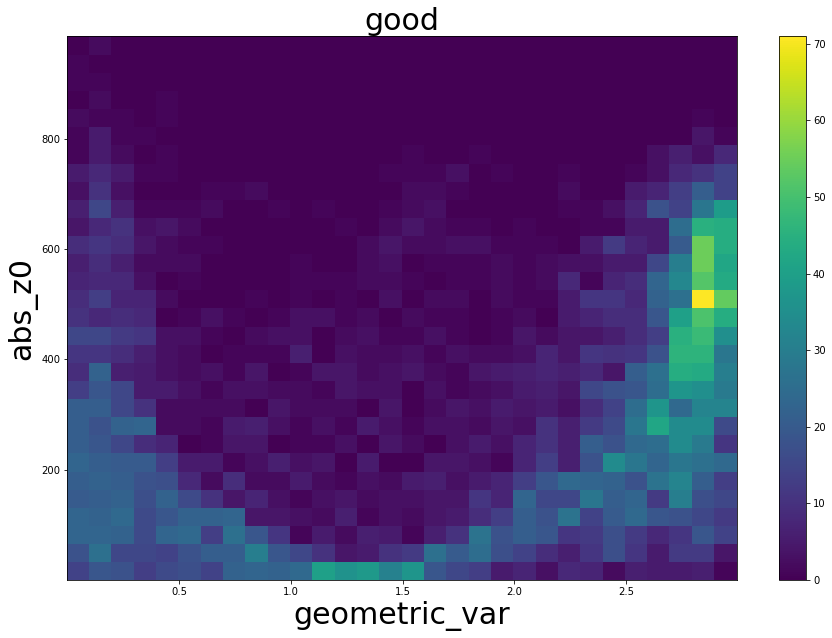

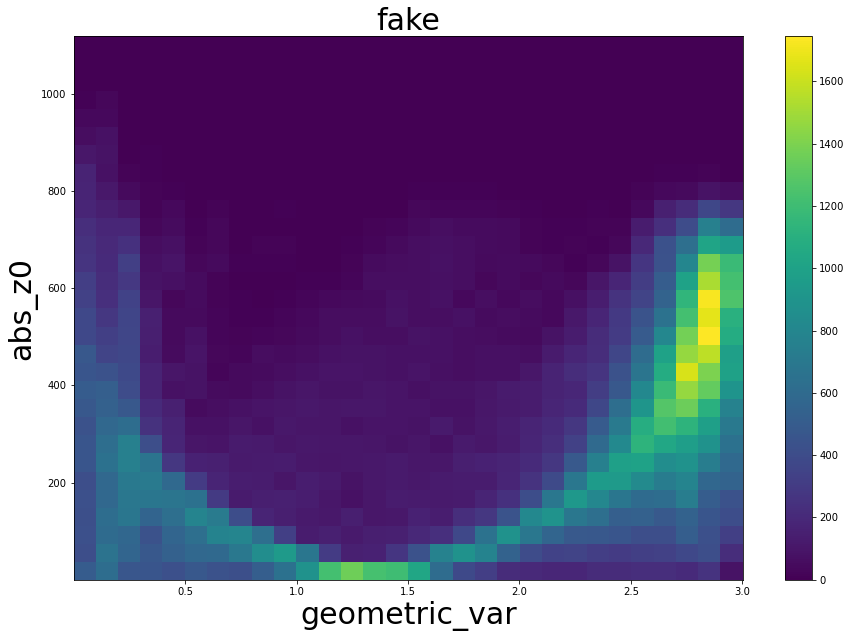

In [14]:
def plot2d(df, var_a, var_b, nentries=1000, bins=[10,10], title=''):
    fig = plt.figure(figsize=[15,10])
    h, xedges, yedges, image = plt.hist2d(x=df[0:nentries][var_a], y=df[0:nentries][var_b], bins=bins)
    plt.colorbar(image)
    ax = fig.gca()
    ax.set_xlabel(var_a, fontsize=30)
    ax.set_ylabel(var_b, fontsize=30)
    ax.set_title(title, fontsize=30)

plot2d(good_lrt_seeds, 'geometric_var', 'abs_z0', -1, [30, 30], 'good')
plot2d(fake_lrt_seeds, 'geometric_var', 'abs_z0', -1, [30, 30], 'fake')

In [8]:
fig = plt.figure(figsize=[10,7])
dataframes = [
    df_seeds[(df_seeds.isLRTrack>0) & (df_seeds.good)],
    df_seeds[(df_seeds.isLRTrack>0) & (df_seeds.good==False)]
]

<Figure size 720x504 with 0 Axes>

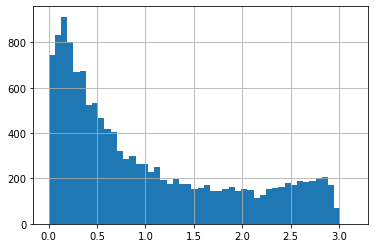

In [9]:
# sanity check
dataframes[0].geometric_var.hist(bins=np.linspace(0,3.14159,50))

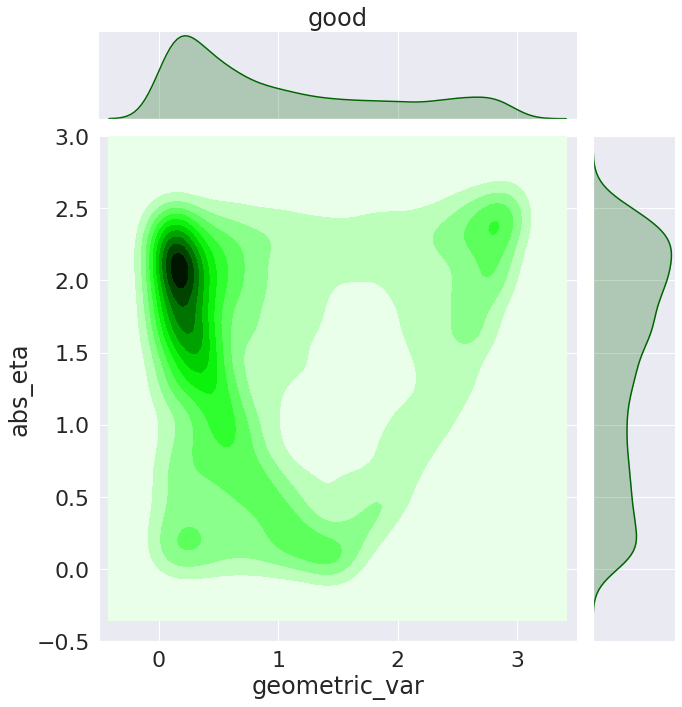

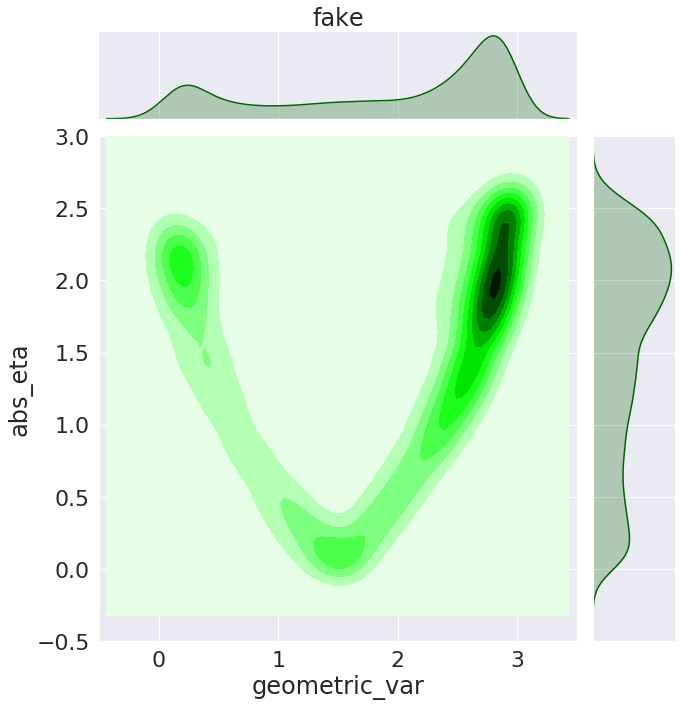

In [11]:
joint_axes = []
sns.set(font_scale=2)
# fig, ax = plt.subplots()

for df, title in zip(dataframes, ['good', 'fake'] ):
    ax = sns.jointplot(x="geometric_var", y="abs_eta", data=df[0:20000], kind="kde", height=10, color='darkgreen', xlim=[-0.5,3.5], ylim=[-.5,3]);
    ax.ax_marg_x.set_title(title)
    joint_axes.append(ax.ax_joint)

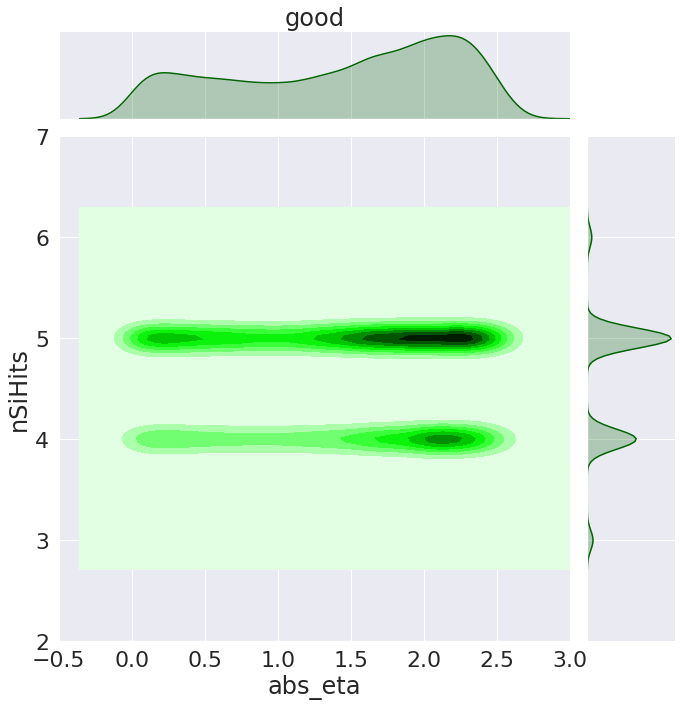

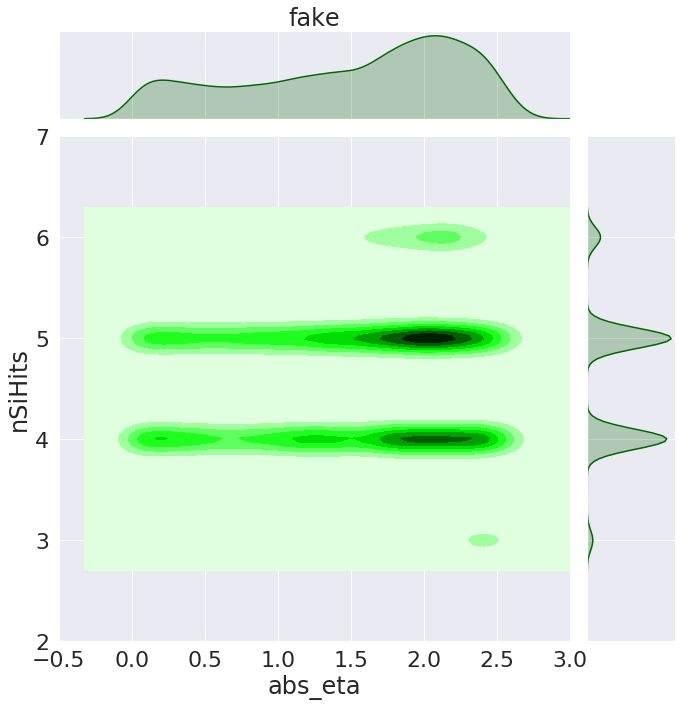

In [12]:
for df, title in zip(dataframes, ['good', 'fake'] ):
    ax = sns.jointplot(x="abs_eta", y="nSiHits", data=df[0:20000], kind="kde", height=10, color='darkgreen', xlim=[-.5,3], ylim=[2,7]);
    ax.ax_marg_x.set_title(title)


In [51]:
import xgboost as xgb
import sklearn
dataframes = [
    df_seeds[(df_seeds.isLRTrack>0) & (df_seeds.good)],
    df_seeds[(df_seeds.isLRTrack>0) & (df_seeds.good==False)]
]
balanced = dataframes[0][0:10000].append(dataframes[1][0:10000])


In [52]:
train, test = sklearn.model_selection.train_test_split(balanced, test_size=0.2)

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200,
                         )

train_columns = [
"pt",
"qOp",
"eta",
"d0",
"z0",
"radiusOdFirstHit",
"nSiHits",
"nPixHits",
"nTRTHits",
"nPixHoles",
"nSiHoles",
"nPixShared",
"nSiShared",
"nContribPixLay",
"nPixOutliers",
"nSiOutliers",
"nTRTOutliers",
"chiSquared",
"nDOF",
"passLoose",
"passTight",
"geometric_var",
]

bdt.fit(train[train_columns], train['good'],)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

Text(0.5, 1.0, 'Decision Scores')

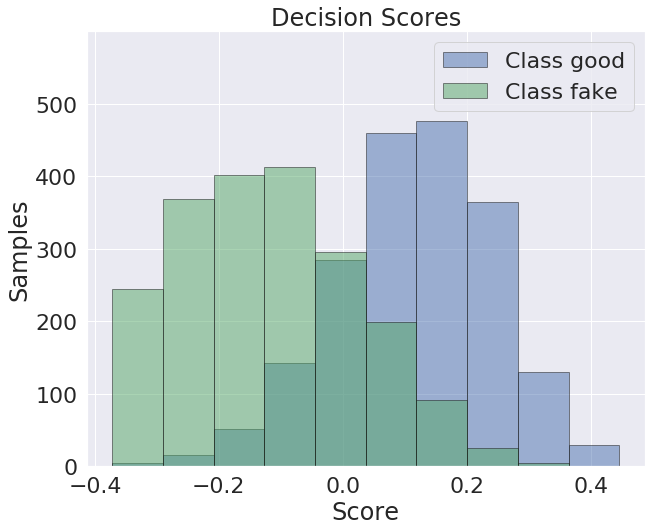

In [76]:
# Plot the two-class decision scores
twoclass_output = bdt.decision_function(test[train_columns])
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.figure(figsize=[10,8])
for i, n, c in zip([True, False], ['good', 'fake'], ['#4C72B0','#55A868']):
    plt.hist(twoclass_output[test['good'] == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')


Text(0.5, 1.0, 'feature importance')

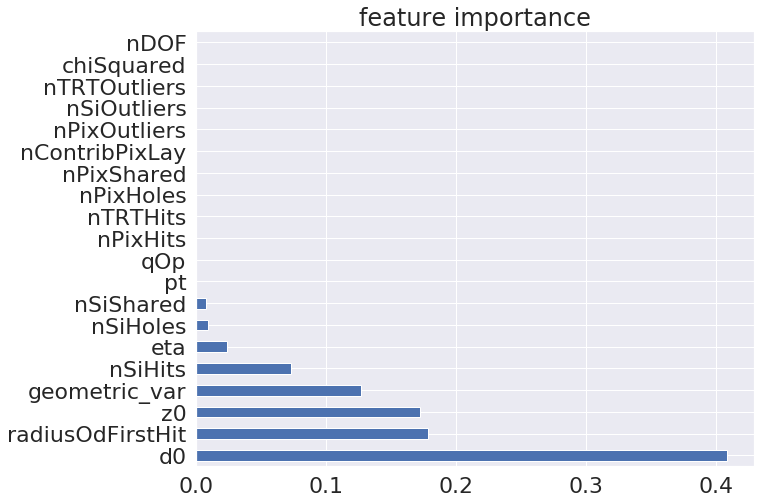

In [82]:
fig = plt.figure(figsize=[10,8])
ax= fig.gca()
list(zip(train_columns, bdt.feature_importances_, ))
feat_importances = pd.Series(bdt.feature_importances_, index=train_columns)
feat_importances.nlargest(20).plot(kind='barh')
ax.set_title("feature importance")